In [ ]:
import pandas as pd
import numpy as np

# Load data
trees = pd.read_csv('/content/covtype.csv')

In [ ]:
trees.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [ ]:
display(trees.info())

In [ ]:
display(trees.describe())

In [ ]:
# Remove outliers for Horizontal_Distance_To_Fire_Points
def outlier_bounds(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    return lower_bound, upper_bound

lb, ub = outlier_bounds(trees, 'Horizontal_Distance_To_Fire_Points')
trees = trees[(trees['Horizontal_Distance_To_Fire_Points'] > lb) &
              (trees['Horizontal_Distance_To_Fire_Points'] < ub)]

# Drop unnecessary or highly correlated columns
trees.drop(columns=['Hillshade_9am'], inplace=True)

In [ ]:
# Adding new features
trees['Euclidean_Distance_To_Hydrology'] = np.sqrt(trees['Horizontal_Distance_To_Hydrology']**2 + trees['Vertical_Distance_To_Hydrology']**2)
trees['Mean_Elevation_Vertical_Hydrology'] = (trees['Elevation'] + trees['Vertical_Distance_To_Hydrology']) / 2
trees['Mean_Distance_Hydrology_Firepoints'] = (trees['Horizontal_Distance_To_Hydrology'] + trees['Horizontal_Distance_To_Fire_Points']) / 2


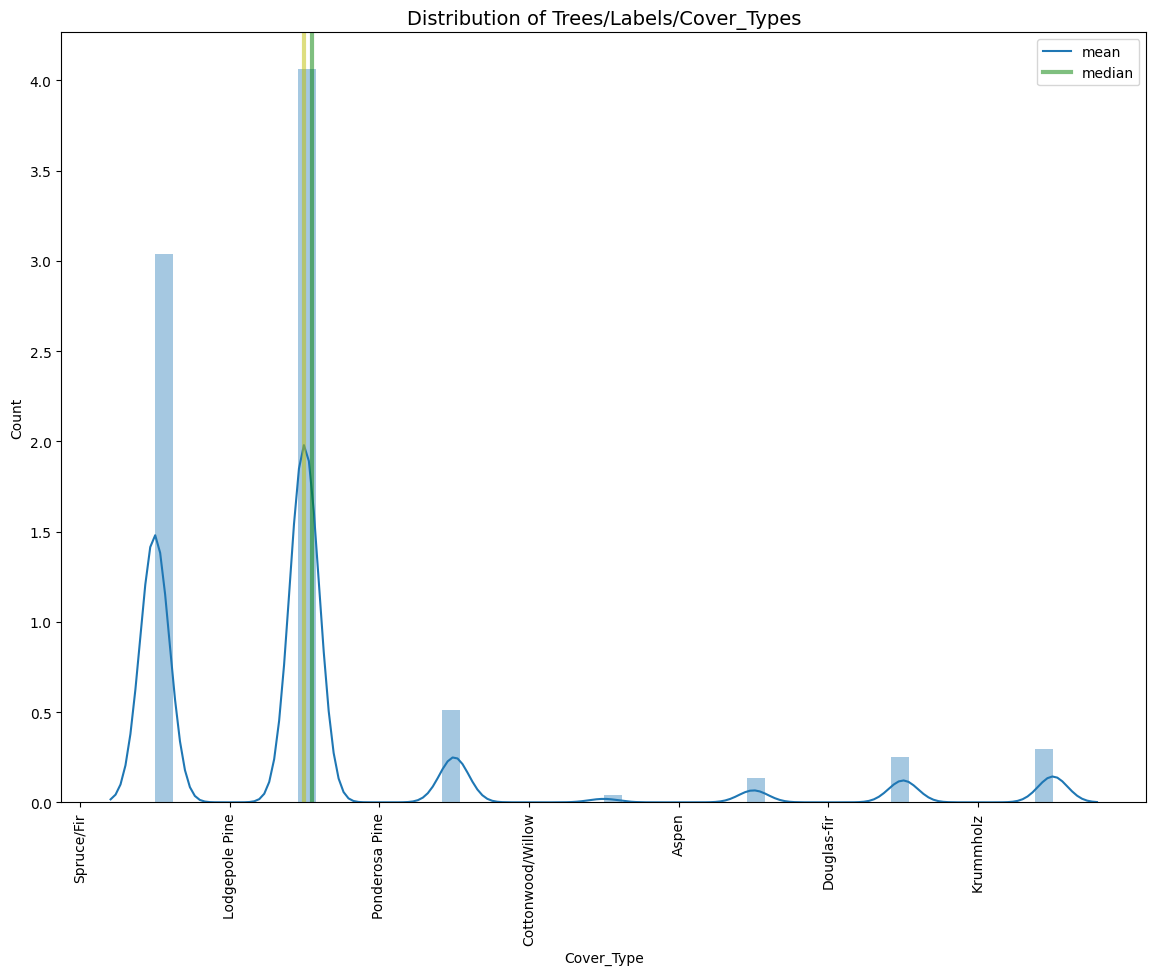

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import warnings
warnings.filterwarnings('ignore')

# set the plot size
plt.figure(figsize=(14,10))

# set the histogram, mean and median
sns.distplot(trees["Cover_Type"], kde=True)
plt.axvline(x=trees.Cover_Type.mean(), linewidth=3, color='g', label="mean", alpha=0.5)
plt.axvline(x=trees.Cover_Type.median(), linewidth=3, color='y', label="median", alpha=0.5)

# set title, legends and labels
plt.xlabel("Cover_Type")
plt.ylabel("Count")
plt.title("Distribution of Trees/Labels/Cover_Types", size=14)
plt.legend(["mean", "median"])

treelist = ['Spruce/Fir','Lodgepole Pine','Ponderosa Pine','Cottonwood/Willow',
         'Aspen','Douglas-fir', 'Krummholz']
plt.xticks([i + 0.5 for i, _ in enumerate(treelist)], treelist, rotation='vertical');

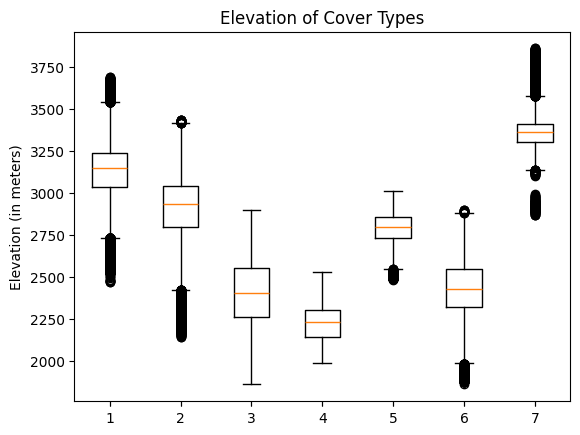

In [ ]:
#Elevation of cover types

spruce = trees[trees.Cover_Type == 1]
lodgepole = trees[trees.Cover_Type == 2]
ponderosa = trees[trees.Cover_Type == 3]
willow = trees[trees.Cover_Type == 4]
aspen = trees[trees.Cover_Type == 5]
douglas = trees[trees.Cover_Type == 6]
krummholz = trees[trees.Cover_Type == 7]
plt.figure()
plt.title('Elevation of Cover Types')
plt.ylabel('Elevation (in meters)')
data = [spruce.Elevation, lodgepole.Elevation, ponderosa.Elevation, willow.Elevation,
aspen.Elevation, douglas.Elevation, krummholz.Elevation]
plt.xticks([1, 2, 3, 4, 5, 6, 7])
plt.boxplot(data)
plt.show()

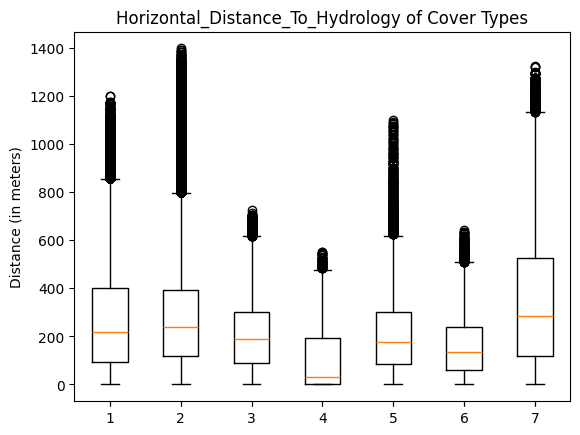

In [ ]:
plt.figure()
plt.title('Horizontal_Distance_To_Hydrology of Cover Types')
plt.ylabel('Distance (in meters)')
data = [spruce.Horizontal_Distance_To_Hydrology, lodgepole.Horizontal_Distance_To_Hydrology,
        ponderosa.Horizontal_Distance_To_Hydrology, willow.Horizontal_Distance_To_Hydrology,
        aspen.Horizontal_Distance_To_Hydrology, douglas.Horizontal_Distance_To_Hydrology,
        krummholz.Horizontal_Distance_To_Hydrology]
plt.xticks([1, 2, 3, 4, 5, 6, 7])
plt.boxplot(data)
plt.show()

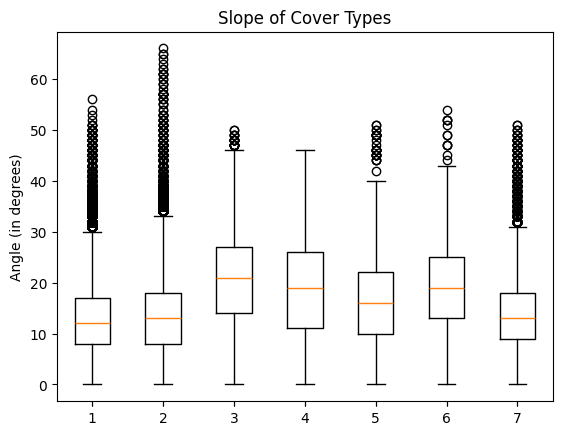

In [ ]:
plt.figure()
plt.title('Slope of Cover Types')
plt.ylabel('Angle (in degrees)')
data = [spruce.Slope, lodgepole.Slope,
        ponderosa.Slope, willow.Slope,
        aspen.Slope, douglas.Slope,
        krummholz.Slope]
plt.xticks([1, 2, 3, 4, 5, 6, 7])
plt.boxplot(data)
plt.show()

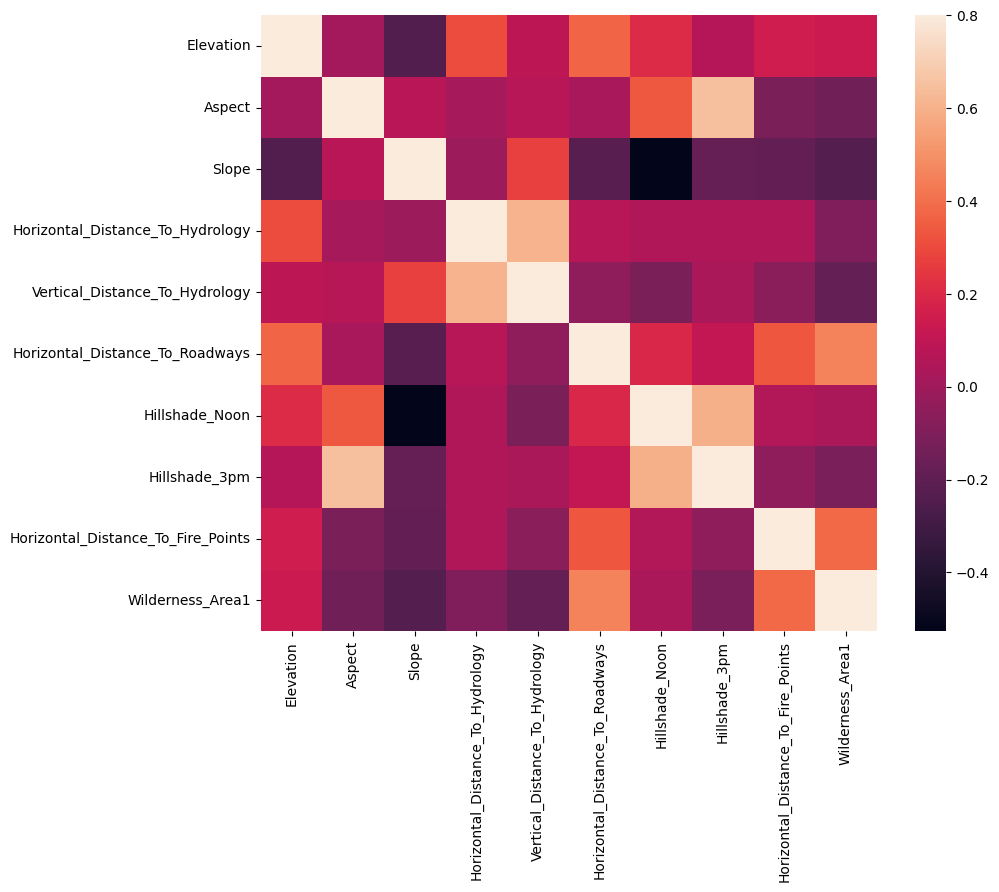

In [ ]:
size = 10
corrmat = trees.iloc[:,:size].corr()
f, ax = plt.subplots(figsize = (10,8))
sns.heatmap(corrmat,vmax=0.8,square=True);

In [ ]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = trees.drop(columns=['Cover_Type'])
y = trees['Cover_Type']

# Train-test split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=1)


In [ ]:
print('Training Data Shape:', X_train.shape)
print('Validation Data Shape:', X_valid.shape)

Training Data Shape: (464801, 56)
Validation Data Shape: (116201, 56)


In [ ]:
# function to train a given model, generate predictions, and return accuracy score
def fit_evaluate_model(model, X_train, y_train, X_valid, Y_valid):
    model.fit(X_train, y_train)
    y_predicted = model.predict(X_valid)
    return accuracy_score(y_valid, y_predicted)

In [ ]:
from sklearn.preprocessing import StandardScaler

# create scaler
scaler = StandardScaler()

# apply normalization to training set and transform training set
X_train_scaled = scaler.fit_transform(X_train, y_train)

# transform validation set
X_valid_scaled = scaler.transform(X_valid)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# create model apply fit_evaluate_model
knn_classifier = KNeighborsClassifier()
knn_accuracy = fit_evaluate_model(knn_classifier, X_train_scaled, y_train, X_valid_scaled, y_valid)
print("Number of correct predictions made out of all predictions are:", knn_accuracy)

Number of correct predictions made out of all predictions are: 0.9387354669925387


In [ ]:
!pip install lightgbm

In [ ]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# create model apply fit_evaluate_model
lgbm_classifier = LGBMClassifier()
lgbm_accuracy = fit_evaluate_model(lgbm_classifier, X_train_scaled, y_train, X_valid_scaled, y_valid)
print("Number of correct predictions made out of all predictions are:", lgbm_accuracy)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.509820 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2784
[LightGBM] [Info] Number of data points in the train set: 464801, number of used features: 55
[LightGBM] [Info] Start training from score -1.008385
[LightGBM] [Info] Start training from score -0.717677
[LightGBM] [Info] Start training from score -2.792758
[LightGBM] [Info] Start training from score -5.352243
[LightGBM] [Info] Start training from score -4.122980
[LightGBM] [Info] Start training from score -3.516216
[LightGBM] [Info] Start training from score -3.340737
Number of correct predictions made out of all predictions are: 0.8573420194318465


In [ ]:
# create model apply fit_evaluate_model
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier()
rf_accuracy = fit_evaluate_model(rf_classifier, X_train, y_train, X_valid, y_valid)
print("Number of correct predictions made out of all predictions are:", rf_accuracy)

Number of correct predictions made out of all predictions are: 0.9644839545270695


In [ ]:
!pip install xgboost

In [ ]:
y_train_shifted = y_train - 1

# Now you can use y_train_shifted for training
xgb_classifier = XGBClassifier()
xgb_accuracy = fit_evaluate_model(xgb_classifier, X_train, y_train_shifted, X_valid, y_valid)  # Use shifted y_train
print("Number of correct predictions made out of all predictions are:", xgb_accuracy)

Number of correct predictions made out of all predictions are: 0.057546836946325765


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score

# Define model
xrf_classifier = ExtraTreesClassifier(n_estimators=500, max_features=None,
                                       min_samples_leaf=1, min_samples_split=2, random_state=42)

# Train model
xrf_classifier.fit(X_train, y_train)

# Validate model
y_pred = xrf_classifier.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred)
print(f"Validation Accuracy: {accuracy:.2f}")


Validation Accuracy: 0.98
